In [1]:
'''generate data'''
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

N = 3000
filename = 'clustering.csv'
with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["x","y"])
    i = 0
    clusters = 3
    while(i<N):
        choice = np.random.uniform(0,1)
        deviation = 20
        if(choice>0.67):
            x = 100 + np.random.normal(0,deviation)
            y = 100 + np.random.normal(0,deviation)
        elif(choice>0.33 and choice<0.67):
            x = 150 + np.random.normal(0,deviation)
            y = 30 + np.random.normal(0,deviation)
        else:
            x = 30 + np.random.normal(0,deviation)
            y = 70 + np.random.normal(0,deviation)
        writer.writerow([x,y])
        i+=1
            


In [2]:
'''Load Data'''
df = pd.read_csv(filename)
df.head()

,x,y
0,81.154585,138.147506
1,176.031487,54.961944
2,106.424488,28.750636
3,48.017023,86.519602
4,149.945846,36.694499


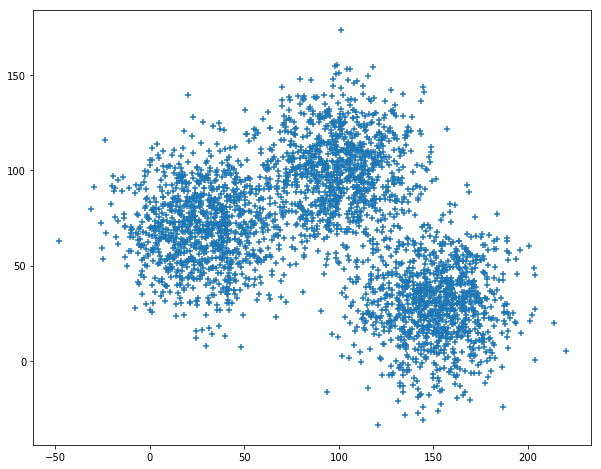

In [3]:
'''Visualize Data points'''
plt.figure(figsize =((10,8)))
plt.scatter(df.x,df.y,marker='+')

Text(0.5,1,'Elbow Method')

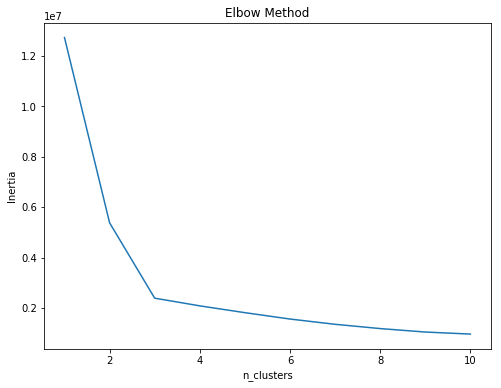

In [4]:
'''ELBOW METHOD'''

from sklearn.cluster import KMeans
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df.values)
    distortions.append(km.inertia_)

plt.figure(figsize =((8,6)))
plt.plot(list(range(1,11)),distortions)
plt.xlabel('n_clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

##### From the above plot we see that there is the elbow at n_cluster=3. Hence 3 will be the optimum number of clusters.

In [5]:
'''Train with chosen parameters'''
km = KMeans(
        n_clusters=3, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [6]:
'''Prediction step'''
ypred = km.predict(df)

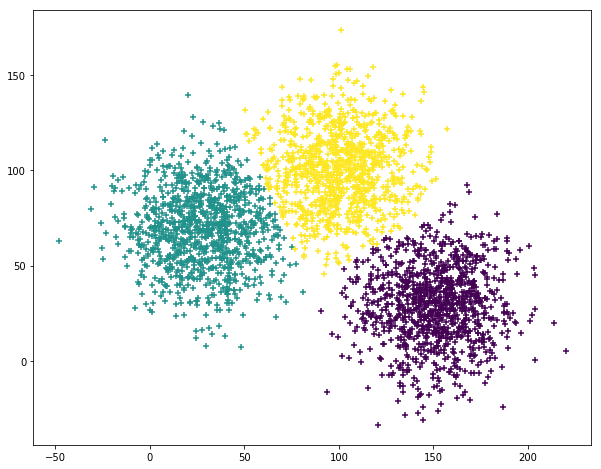

In [7]:
'''Visulaize results'''
plt.figure(figsize =((10,8)))
plt.scatter(df.x,df.y,marker='+',c=ypred + 2)